In [1]:
from fastcore.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
from PIL import Image 

In [2]:
path = Path("NF1 Extract August/data/train(lots)")
codes = np.loadtxt(path/'label_names.txt', dtype=str)
def label_func(fn): return path/"masks"/f"{fn.stem}_P.png"
fnames = get_image_files(path/"images")

dls = SegmentationDataLoaders.from_label_func(
    path, bs=6, fnames = fnames, label_func = label_func, codes = codes, item_tfms=Resize(256)
)

In [3]:
predict = unet_learner(dls, resnet34)
predict.load('all_model')

<Axes: >

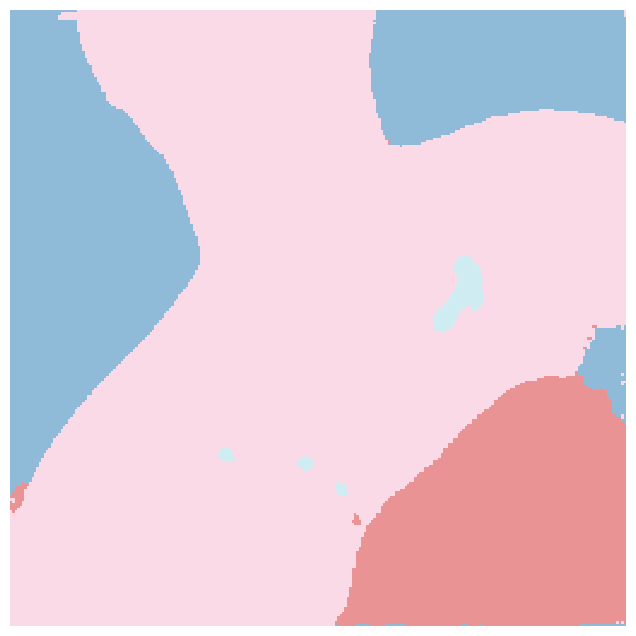

In [8]:
img = Image.open(fnames[7])
img = img.resize((720,720))
prediction = predict.predict(img)
prediction[0].show(figsize=(8,8))

<Axes: >

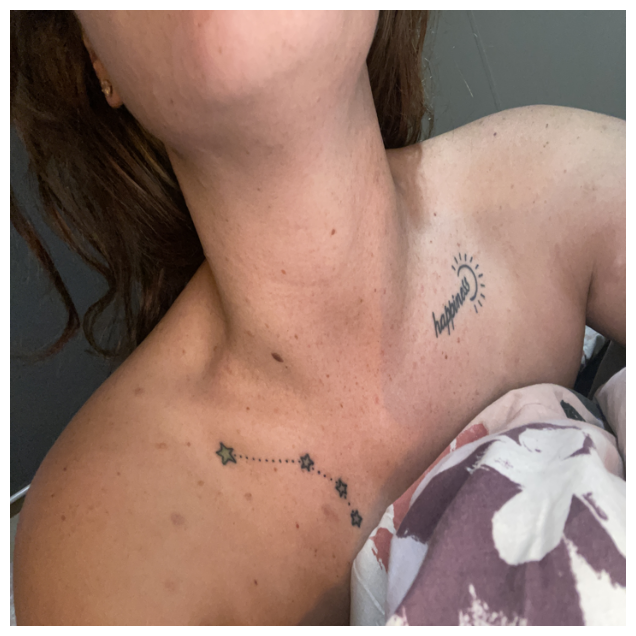

In [9]:
img.show(figsize=(8,8))